# overfiting

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


データ読み込み完了
Generation: 0010. 正答率(トレーニング) = 0.2167 正答率(テスト) = 0.1653
Generation: 0020. 正答率(トレーニング) = 0.2833 正答率(テスト) = 0.2194
Generation: 0030. 正答率(トレーニング) = 0.3300 正答率(テスト) = 0.2572
Generation: 0040. 正答率(トレーニング) = 0.3967 正答率(テスト) = 0.3019
Generation: 0050. 正答率(トレーニング) = 0.4633 正答率(テスト) = 0.3648
Generation: 0060. 正答率(トレーニング) = 0.5700 正答率(テスト) = 0.4452
Generation: 0070. 正答率(トレーニング) = 0.6267 正答率(テスト) = 0.4867
Generation: 0080. 正答率(トレーニング) = 0.7133 正答率(テスト) = 0.5652
Generation: 0090. 正答率(トレーニング) = 0.7100 正答率(テスト) = 0.5683
Generation: 0100. 正答率(トレーニング) = 0.7633 正答率(テスト) = 0.6017
Generation: 0110. 正答率(トレーニング) = 0.7967 正答率(テスト) = 0.6270
Generation: 0120. 正答率(トレーニング) = 0.8300 正答率(テスト) = 0.6377
Generation: 0130. 正答率(トレーニング) = 0.8400 正答率(テスト) = 0.6448
Generation: 0140. 正答率(トレーニング) = 0.8500 正答率(テスト) = 0.6661
Generation: 0150. 正答率(トレーニング) = 0.8700 正答率(テスト) = 0.6722
Generation: 0160. 正答率(トレーニング) = 0.8867 正答率(テスト) = 0.6791
Generation: 0170. 正答率(トレーニング) = 0.8933 正答率(テスト) = 0.6825
Generation: 0180. 正答率

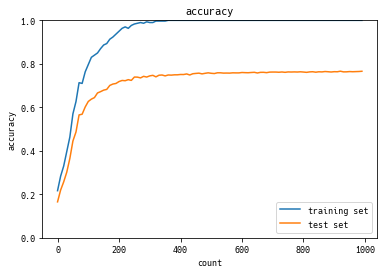

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
################################################################################
## weight_decay_lambda = 0.01
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.1733 正答率(テスト) = 0.1245
Generation: 0020. 正答率(トレーニング) = 0.2667 正答率(テスト) = 0.1840
Generation: 0030. 正答率(トレーニング) = 0.3700 正答率(テスト) = 0.2397
Generation: 0040. 正答率(トレーニング) = 0.4233 正答率(テスト) = 0.2861
Generation: 0050. 正答率(トレーニング) = 0.4933 正答率(テスト) = 0.3418
Generation: 0060. 正答率(トレーニング) = 0.5067 正答率(テスト) = 0.3796
Generation: 0070. 正答率(トレーニング) = 0.5533 正答率(テスト) = 0.4117
Generation: 0080. 正答率(トレーニング) = 0.5867 正答率(テスト) = 0.4312
Generation: 0090. 正答率(トレーニング) = 0.6267 正答率(テスト) = 0.4643
Generation: 0100. 正答率(トレーニング) = 0.6700 正答率(テスト) = 0.4947
Generation: 0110. 正答率(トレーニング) = 0.6867 正答率(テスト) = 0.5153
Generation: 0120. 正答率(トレーニング) = 0.7467 正答率(テスト) = 0.5590
Generation: 0130. 正答率(トレーニング) = 0.7967 正答率(テスト) = 0.5845
Generation: 0140. 正答率(トレーニング) = 0.8200 正答率(テスト) = 0.5956


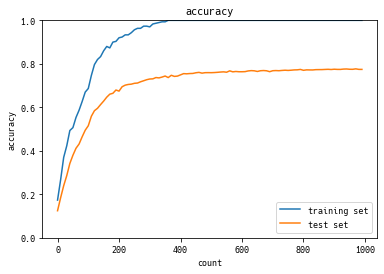

################################################################################
## weight_decay_lambda = 0.1
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.3333 正答率(テスト) = 0.2424
Generation: 0020. 正答率(トレーニング) = 0.3933 正答率(テスト) = 0.2888
Generation: 0030. 正答率(トレーニング) = 0.4333 正答率(テスト) = 0.3149
Generation: 0040. 正答率(トレーニング) = 0.4767 正答率(テスト) = 0.3522
Generation: 0050. 正答率(トレーニング) = 0.5367 正答率(テスト) = 0.3939
Generation: 0060. 正答率(トレーニング) = 0.5433 正答率(テスト) = 0.4128
Generation: 0070. 正答率(トレーニング) = 0.6000 正答率(テスト) = 0.4343
Generation: 0080. 正答率(トレーニング) = 0.6433 正答率(テスト) = 0.4813
Generation: 0090. 正答率(トレーニング) = 0.6433 正答率(テスト) = 0.4965
Generation: 0100. 正答率(トレーニング) = 0.7067 正答率(テスト) = 0.5387
Generation: 0110. 正答率(トレーニング) = 0.7167 正答率(テスト) = 0.5557
Generation: 0120. 正答率(トレーニング) = 0.7333 正答率(テスト) = 0.5630
Generation: 0130. 正答率(トレーニング) = 0.7500 正答率(テスト) = 0.5838
Generation: 0140. 正答率(トレーニング) = 0.7567 正答率(テスト) = 0.6011
Generation:

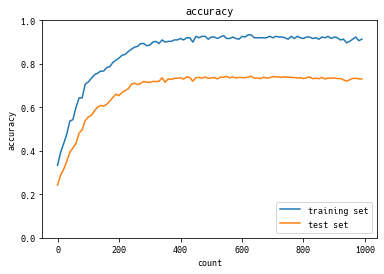

################################################################################
## weight_decay_lambda = 0.133
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.1400 正答率(テスト) = 0.1222
Generation: 0020. 正答率(トレーニング) = 0.1967 正答率(テスト) = 0.1707
Generation: 0030. 正答率(トレーニング) = 0.3133 正答率(テスト) = 0.2391
Generation: 0040. 正答率(トレーニング) = 0.3900 正答率(テスト) = 0.2859
Generation: 0050. 正答率(トレーニング) = 0.4833 正答率(テスト) = 0.3402
Generation: 0060. 正答率(トレーニング) = 0.5200 正答率(テスト) = 0.3672
Generation: 0070. 正答率(トレーニング) = 0.5500 正答率(テスト) = 0.3866
Generation: 0080. 正答率(トレーニング) = 0.5700 正答率(テスト) = 0.4069
Generation: 0090. 正答率(トレーニング) = 0.5833 正答率(テスト) = 0.4433
Generation: 0100. 正答率(トレーニング) = 0.5967 正答率(テスト) = 0.4447
Generation: 0110. 正答率(トレーニング) = 0.6300 正答率(テスト) = 0.4741
Generation: 0120. 正答率(トレーニング) = 0.6300 正答率(テスト) = 0.4916
Generation: 0130. 正答率(トレーニング) = 0.6400 正答率(テスト) = 0.5039
Generation: 0140. 正答率(トレーニング) = 0.6600 正答率(テスト) = 0.5145
Generatio

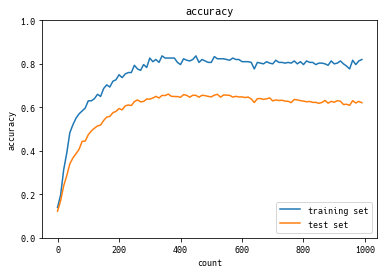

################################################################################
## weight_decay_lambda = 0.166
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.1500 正答率(テスト) = 0.1129
Generation: 0020. 正答率(トレーニング) = 0.2300 正答率(テスト) = 0.1511
Generation: 0030. 正答率(トレーニング) = 0.3300 正答率(テスト) = 0.1942
Generation: 0040. 正答率(トレーニング) = 0.3800 正答率(テスト) = 0.2345
Generation: 0050. 正答率(トレーニング) = 0.4633 正答率(テスト) = 0.2866
Generation: 0060. 正答率(トレーニング) = 0.5033 正答率(テスト) = 0.3235
Generation: 0070. 正答率(トレーニング) = 0.5200 正答率(テスト) = 0.3511
Generation: 0080. 正答率(トレーニング) = 0.5267 正答率(テスト) = 0.3834
Generation: 0090. 正答率(トレーニング) = 0.5433 正答率(テスト) = 0.3944
Generation: 0100. 正答率(トレーニング) = 0.5767 正答率(テスト) = 0.4172
Generation: 0110. 正答率(トレーニング) = 0.5767 正答率(テスト) = 0.4174
Generation: 0120. 正答率(トレーニング) = 0.5967 正答率(テスト) = 0.4311
Generation: 0130. 正答率(トレーニング) = 0.6100 正答率(テスト) = 0.4374
Generation: 0140. 正答率(トレーニング) = 0.6100 正答率(テスト) = 0.4432
Generatio

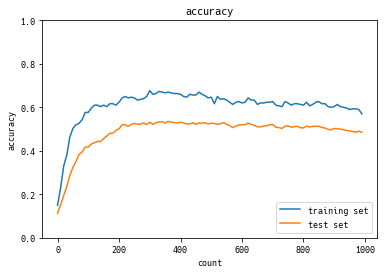

################################################################################
## weight_decay_lambda = 0.2
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.1500 正答率(テスト) = 0.1467
Generation: 0020. 正答率(トレーニング) = 0.2067 正答率(テスト) = 0.1675
Generation: 0030. 正答率(トレーニング) = 0.2333 正答率(テスト) = 0.1834
Generation: 0040. 正答率(トレーニング) = 0.3100 正答率(テスト) = 0.2111
Generation: 0050. 正答率(トレーニング) = 0.3467 正答率(テスト) = 0.2326
Generation: 0060. 正答率(トレーニング) = 0.3867 正答率(テスト) = 0.2491
Generation: 0070. 正答率(トレーニング) = 0.4100 正答率(テスト) = 0.2781
Generation: 0080. 正答率(トレーニング) = 0.4567 正答率(テスト) = 0.2993
Generation: 0090. 正答率(トレーニング) = 0.4933 正答率(テスト) = 0.3206
Generation: 0100. 正答率(トレーニング) = 0.5233 正答率(テスト) = 0.3263
Generation: 0110. 正答率(トレーニング) = 0.5333 正答率(テスト) = 0.3383
Generation: 0120. 正答率(トレーニング) = 0.5100 正答率(テスト) = 0.3380
Generation: 0130. 正答率(トレーニング) = 0.4967 正答率(テスト) = 0.3349
Generation: 0140. 正答率(トレーニング) = 0.5133 正答率(テスト) = 0.3325
Generation:

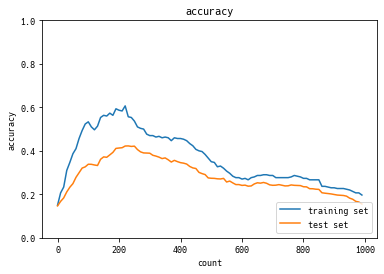

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
#weight_decay_lambda = 0.1
weight_decay_lambda = 0.01
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

train_loss_list = []
accuracies_train = []
accuracies_test = []

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

train_loss_list = []
accuracies_train = []
accuracies_test = []

# 正則化強度設定 ======================================
weight_decay_lambda = 0.133
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

train_loss_list = []
accuracies_train = []
accuracies_test = []

# 正則化強度設定 ======================================
weight_decay_lambda = 0.166
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

train_loss_list = []
accuracies_train = []
accuracies_test = []

# 正則化強度設定 ======================================
weight_decay_lambda = 0.2
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


### L1

データ読み込み完了
################################################################################
## weight_decay_lambda = 0.003
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.5033 正答率(テスト) = 0.3363
Generation: 0020. 正答率(トレーニング) = 0.8133 正答率(テスト) = 0.6350
Generation: 0030. 正答率(トレーニング) = 0.8233 正答率(テスト) = 0.6501
Generation: 0040. 正答率(トレーニング) = 0.7900 正答率(テスト) = 0.6014
Generation: 0050. 正答率(トレーニング) = 0.9267 正答率(テスト) = 0.7109
Generation: 0060. 正答率(トレーニング) = 0.7567 正答率(テスト) = 0.5855
Generation: 0070. 正答率(トレーニング) = 0.9667 正答率(テスト) = 0.7688
Generation: 0080. 正答率(トレーニング) = 0.9667 正答率(テスト) = 0.7775
Generation: 0090. 正答率(トレーニング) = 0.9800 正答率(テスト) = 0.7697
Generation: 0100. 正答率(トレーニング) = 0.8600 正答率(テスト) = 0.6717
Generation: 0110. 正答率(トレーニング) = 0.9900 正答率(テスト) = 0.7778
Generation: 0120. 正答率(トレーニング) = 0.8700 正答率(テスト) = 0.6678
Generation: 0130. 正答率(トレーニング) = 0.9867 正答率(テスト) = 0.7823
Generation: 0140. 正答率(トレーニング) = 0.9900 正答率(テスト) = 0.7632

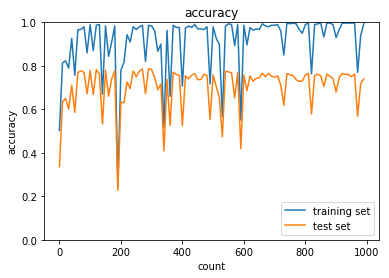

################################################################################
## weight_decay_lambda = 0.004
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.5267 正答率(テスト) = 0.4105
Generation: 0020. 正答率(トレーニング) = 0.3467 正答率(テスト) = 0.3020
Generation: 0030. 正答率(トレーニング) = 0.7767 正答率(テスト) = 0.5935
Generation: 0040. 正答率(トレーニング) = 0.7933 正答率(テスト) = 0.6454
Generation: 0050. 正答率(トレーニング) = 0.8633 正答率(テスト) = 0.6781
Generation: 0060. 正答率(トレーニング) = 0.8333 正答率(テスト) = 0.6453
Generation: 0070. 正答率(トレーニング) = 0.7500 正答率(テスト) = 0.5920
Generation: 0080. 正答率(トレーニング) = 0.7967 正答率(テスト) = 0.6103
Generation: 0090. 正答率(トレーニング) = 0.9433 正答率(テスト) = 0.7300
Generation: 0100. 正答率(トレーニング) = 0.7967 正答率(テスト) = 0.6166
Generation: 0110. 正答率(トレーニング) = 0.7767 正答率(テスト) = 0.6140
Generation: 0120. 正答率(トレーニング) = 0.9567 正答率(テスト) = 0.7532
Generation: 0130. 正答率(トレーニング) = 0.7567 正答率(テスト) = 0.5913
Generation: 0140. 正答率(トレーニング) = 0.9033 正答率(テスト) = 0.6837
Generatio

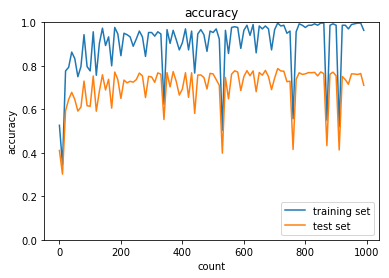

################################################################################
## weight_decay_lambda = 0.005
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.3400 正答率(テスト) = 0.2744
Generation: 0020. 正答率(トレーニング) = 0.7233 正答率(テスト) = 0.5788
Generation: 0030. 正答率(トレーニング) = 0.4767 正答率(テスト) = 0.4210
Generation: 0040. 正答率(トレーニング) = 0.6800 正答率(テスト) = 0.5425
Generation: 0050. 正答率(トレーニング) = 0.8200 正答率(テスト) = 0.6443
Generation: 0060. 正答率(トレーニング) = 0.7700 正答率(テスト) = 0.6025
Generation: 0070. 正答率(トレーニング) = 0.8800 正答率(テスト) = 0.7090
Generation: 0080. 正答率(トレーニング) = 0.9100 正答率(テスト) = 0.7300
Generation: 0090. 正答率(トレーニング) = 0.9467 正答率(テスト) = 0.7768
Generation: 0100. 正答率(トレーニング) = 0.9167 正答率(テスト) = 0.7171
Generation: 0110. 正答率(トレーニング) = 0.9367 正答率(テスト) = 0.7221
Generation: 0120. 正答率(トレーニング) = 0.9333 正答率(テスト) = 0.7287
Generation: 0130. 正答率(トレーニング) = 0.7933 正答率(テスト) = 0.6375
Generation: 0140. 正答率(トレーニング) = 0.6267 正答率(テスト) = 0.4958
Generatio

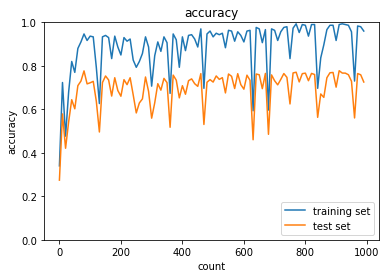

################################################################################
## weight_decay_lambda = 0.006
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.4767 正答率(テスト) = 0.3651
Generation: 0020. 正答率(トレーニング) = 0.3967 正答率(テスト) = 0.3378
Generation: 0030. 正答率(トレーニング) = 0.8000 正答率(テスト) = 0.6354
Generation: 0040. 正答率(トレーニング) = 0.7767 正答率(テスト) = 0.5787
Generation: 0050. 正答率(トレーニング) = 0.6067 正答率(テスト) = 0.4483
Generation: 0060. 正答率(トレーニング) = 0.7033 正答率(テスト) = 0.5624
Generation: 0070. 正答率(トレーニング) = 0.7900 正答率(テスト) = 0.6157
Generation: 0080. 正答率(トレーニング) = 0.8767 正答率(テスト) = 0.6760
Generation: 0090. 正答率(トレーニング) = 0.6333 正答率(テスト) = 0.4832
Generation: 0100. 正答率(トレーニング) = 0.8433 正答率(テスト) = 0.6578
Generation: 0110. 正答率(トレーニング) = 0.8600 正答率(テスト) = 0.6424
Generation: 0120. 正答率(トレーニング) = 0.7167 正答率(テスト) = 0.5665
Generation: 0130. 正答率(トレーニング) = 0.8200 正答率(テスト) = 0.6629
Generation: 0140. 正答率(トレーニング) = 0.8500 正答率(テスト) = 0.6464
Generatio

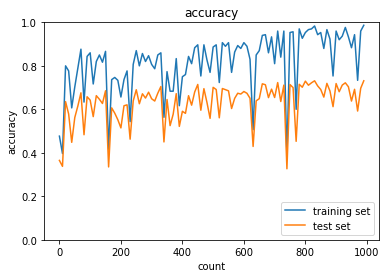

################################################################################
## weight_decay_lambda = 0.007
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.1533 正答率(テスト) = 0.1582
Generation: 0020. 正答率(トレーニング) = 0.6200 正答率(テスト) = 0.4919
Generation: 0030. 正答率(トレーニング) = 0.6333 正答率(テスト) = 0.5107
Generation: 0040. 正答率(トレーニング) = 0.7833 正答率(テスト) = 0.5992
Generation: 0050. 正答率(トレーニング) = 0.6867 正答率(テスト) = 0.5170
Generation: 0060. 正答率(トレーニング) = 0.5067 正答率(テスト) = 0.4019
Generation: 0070. 正答率(トレーニング) = 0.7400 正答率(テスト) = 0.5715
Generation: 0080. 正答率(トレーニング) = 0.8200 正答率(テスト) = 0.6292
Generation: 0090. 正答率(トレーニング) = 0.7067 正答率(テスト) = 0.5605
Generation: 0100. 正答率(トレーニング) = 0.7333 正答率(テスト) = 0.5600
Generation: 0110. 正答率(トレーニング) = 0.8000 正答率(テスト) = 0.6210
Generation: 0120. 正答率(トレーニング) = 0.7867 正答率(テスト) = 0.5936
Generation: 0130. 正答率(トレーニング) = 0.8567 正答率(テスト) = 0.6792
Generation: 0140. 正答率(トレーニング) = 0.5367 正答率(テスト) = 0.4263
Generatio

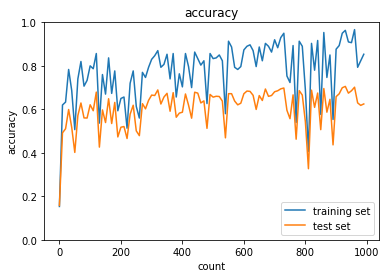

In [17]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
#weight_decay_lambda = 0.005
weight_decay_lambda = 0.003
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

train_loss_list = []
accuracies_train = []
accuracies_test = []

# 正則化強度設定 ======================================
#weight_decay_lambda = 0.005
weight_decay_lambda = 0.004
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

train_loss_list = []
accuracies_train = []
accuracies_test = []

# 正則化強度設定 ======================================
#weight_decay_lambda = 0.005
weight_decay_lambda = 0.005
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

train_loss_list = []
accuracies_train = []
accuracies_test = []

# 正則化強度設定 ======================================
#weight_decay_lambda = 0.005
weight_decay_lambda = 0.006
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

train_loss_list = []
accuracies_train = []
accuracies_test = []

# 正則化強度設定 ======================================
#weight_decay_lambda = 0.005
weight_decay_lambda = 0.007
# =================================================

print('################################################################################')
print('## weight_decay_lambda = ' + str(weight_decay_lambda))
print('################################################################################')

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

`考察`

- 各ソースに直接修正して確認した


## Dropout

In [5]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
################################################################################
## dropout_radio = 0.05
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.4233 正答率(テスト) = 0.3081
Generation: 0020. 正答率(トレーニング) = 0.6533 正答率(テスト) = 0.5037
Generation: 0030. 正答率(トレーニング) = 0.8467 正答率(テスト) = 0.6861
Generation: 0040. 正答率(トレーニング) = 0.9300 正答率(テスト) = 0.7419
Generation: 0050. 正答率(トレーニング) = 0.9600 正答率(テスト) = 0.7648
Generation: 0060. 正答率(トレーニング) = 0.9800 正答率(テスト) = 0.7701
Generation: 0070. 正答率(トレーニング) = 0.9867 正答率(テスト) = 0.7900
Generation: 0080. 正答率(トレーニング) = 0.9933 正答率(テスト) = 0.8041
Generation: 0090. 正答率(トレーニング) = 0.9967 正答率(テスト) = 0.7908
Generation: 0100. 正答率(トレーニング) = 0.9967 正答率(テスト) = 0.8138
Generation: 0110. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.8046
Generation: 0120. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.8070
Generation: 0130. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.8005
Generation: 0140. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.8154
Genera

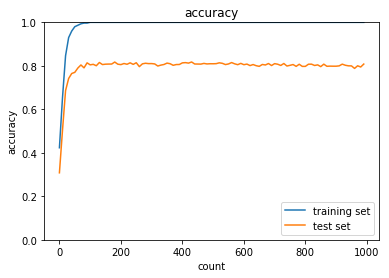

################################################################################
## dropout_radio = 0.1
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.4267 正答率(テスト) = 0.3535
Generation: 0020. 正答率(トレーニング) = 0.6900 正答率(テスト) = 0.5326
Generation: 0030. 正答率(トレーニング) = 0.7433 正答率(テスト) = 0.5510
Generation: 0040. 正答率(トレーニング) = 0.8800 正答率(テスト) = 0.7018
Generation: 0050. 正答率(トレーニング) = 0.9567 正答率(テスト) = 0.7424
Generation: 0060. 正答率(トレーニング) = 0.9733 正答率(テスト) = 0.7478
Generation: 0070. 正答率(トレーニング) = 0.9933 正答率(テスト) = 0.7780
Generation: 0080. 正答率(トレーニング) = 0.9967 正答率(テスト) = 0.7726
Generation: 0090. 正答率(トレーニング) = 0.9967 正答率(テスト) = 0.7785
Generation: 0100. 正答率(トレーニング) = 0.9967 正答率(テスト) = 0.7836
Generation: 0110. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.7827
Generation: 0120. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.7860
Generation: 0130. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.7840
Generation: 0140. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.7798
Generation: 0150.

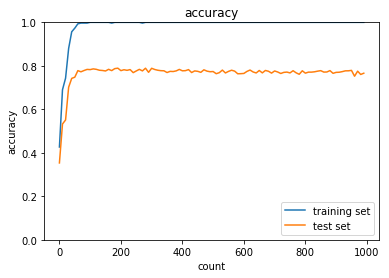

################################################################################
## dropout_radio = 0.15
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.2600 正答率(テスト) = 0.2135
Generation: 0020. 正答率(トレーニング) = 0.4700 正答率(テスト) = 0.3882
Generation: 0030. 正答率(トレーニング) = 0.6900 正答率(テスト) = 0.5401
Generation: 0040. 正答率(トレーニング) = 0.7733 正答率(テスト) = 0.6048
Generation: 0050. 正答率(トレーニング) = 0.8833 正答率(テスト) = 0.6890
Generation: 0060. 正答率(トレーニング) = 0.9167 正答率(テスト) = 0.7161
Generation: 0070. 正答率(トレーニング) = 0.9667 正答率(テスト) = 0.7489
Generation: 0080. 正答率(トレーニング) = 0.9933 正答率(テスト) = 0.7735
Generation: 0090. 正答率(トレーニング) = 0.9867 正答率(テスト) = 0.7872
Generation: 0100. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.8007
Generation: 0110. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.7934
Generation: 0120. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.8078
Generation: 0130. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.8054
Generation: 0140. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.7971
Generation: 0150

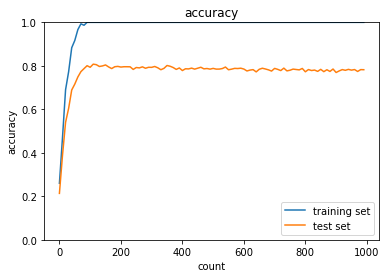

################################################################################
## dropout_radio = 0.2
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.3567 正答率(テスト) = 0.2932
Generation: 0020. 正答率(トレーニング) = 0.3633 正答率(テスト) = 0.3077
Generation: 0030. 正答率(トレーニング) = 0.5633 正答率(テスト) = 0.4321
Generation: 0040. 正答率(トレーニング) = 0.7533 正答率(テスト) = 0.5758
Generation: 0050. 正答率(トレーニング) = 0.8233 正答率(テスト) = 0.6376
Generation: 0060. 正答率(トレーニング) = 0.8433 正答率(テスト) = 0.6559
Generation: 0070. 正答率(トレーニング) = 0.9300 正答率(テスト) = 0.7050
Generation: 0080. 正答率(トレーニング) = 0.9633 正答率(テスト) = 0.7347
Generation: 0090. 正答率(トレーニング) = 0.9867 正答率(テスト) = 0.7585
Generation: 0100. 正答率(トレーニング) = 0.9867 正答率(テスト) = 0.7567
Generation: 0110. 正答率(トレーニング) = 0.9933 正答率(テスト) = 0.7560
Generation: 0120. 正答率(トレーニング) = 0.9967 正答率(テスト) = 0.7716
Generation: 0130. 正答率(トレーニング) = 1.0000 正答率(テスト) = 0.7676
Generation: 0140. 正答率(トレーニング) = 0.9967 正答率(テスト) = 0.7806
Generation: 0150.

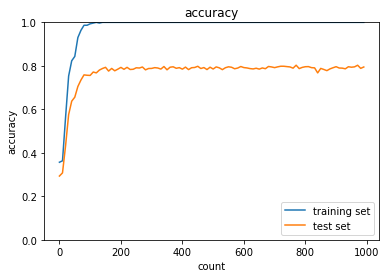

################################################################################
## dropout_radio = 0.25
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.1533 正答率(テスト) = 0.1343
Generation: 0020. 正答率(トレーニング) = 0.2867 正答率(テスト) = 0.2408
Generation: 0030. 正答率(トレーニング) = 0.2233 正答率(テスト) = 0.1996
Generation: 0040. 正答率(トレーニング) = 0.2833 正答率(テスト) = 0.2474
Generation: 0050. 正答率(トレーニング) = 0.4267 正答率(テスト) = 0.3449
Generation: 0060. 正答率(トレーニング) = 0.5467 正答率(テスト) = 0.4705
Generation: 0070. 正答率(トレーニング) = 0.5867 正答率(テスト) = 0.4872
Generation: 0080. 正答率(トレーニング) = 0.7000 正答率(テスト) = 0.5893
Generation: 0090. 正答率(トレーニング) = 0.7333 正答率(テスト) = 0.5964
Generation: 0100. 正答率(トレーニング) = 0.7633 正答率(テスト) = 0.6564
Generation: 0110. 正答率(トレーニング) = 0.8000 正答率(テスト) = 0.6822
Generation: 0120. 正答率(トレーニング) = 0.8633 正答率(テスト) = 0.7058
Generation: 0130. 正答率(トレーニング) = 0.8933 正答率(テスト) = 0.7163
Generation: 0140. 正答率(トレーニング) = 0.9133 正答率(テスト) = 0.7274
Generation: 0150

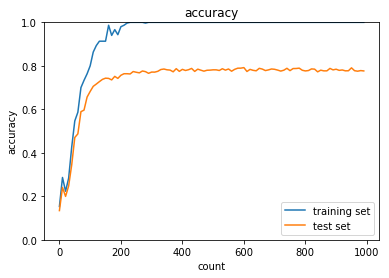

In [26]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.05
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005  ## 【レポート提出者追加】
# =================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)

# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.10
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.15
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.20
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.25
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう


`考察`

- 各ソースに直接修正して確認した

## [try] optimizerとdropout_ratioの値を変更してみよう


`考察`

- 各ソースに直接修正して確認した

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dropout + L1

データ読み込み完了
################################################################################
## dropout_radio = 0.04
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.1600 正答率(テスト) = 0.1192
Generation: 0020. 正答率(トレーニング) = 0.1800 正答率(テスト) = 0.1481
Generation: 0030. 正答率(トレーニング) = 0.2167 正答率(テスト) = 0.1809
Generation: 0040. 正答率(トレーニング) = 0.2467 正答率(テスト) = 0.2088
Generation: 0050. 正答率(トレーニング) = 0.3133 正答率(テスト) = 0.2399
Generation: 0060. 正答率(トレーニング) = 0.3600 正答率(テスト) = 0.2702
Generation: 0070. 正答率(トレーニング) = 0.3933 正答率(テスト) = 0.2903
Generation: 0080. 正答率(トレーニング) = 0.4200 正答率(テスト) = 0.3072
Generation: 0090. 正答率(トレーニング) = 0.4567 正答率(テスト) = 0.3279
Generation: 0100. 正答率(トレーニング) = 0.4733 正答率(テスト) = 0.3459
Generation: 0110. 正答率(トレーニング) = 0.5433 正答率(テスト) = 0.3861
Generation: 0120. 正答率(トレーニング) = 0.5600 正答率(テスト) = 0.3992
Generation: 0130. 正答率(トレーニング) = 0.5767 正答率(テスト) = 0.4218
Generation: 0140. 正答率(トレーニング) = 0.6067 正答率(テスト) = 0.4506
Genera

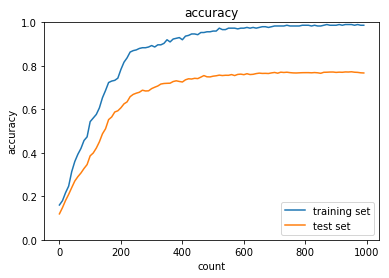

################################################################################
## dropout_radio = 0.06
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.0967 正答率(テスト) = 0.1131
Generation: 0020. 正答率(トレーニング) = 0.1600 正答率(テスト) = 0.1468
Generation: 0030. 正答率(トレーニング) = 0.1967 正答率(テスト) = 0.1755
Generation: 0040. 正答率(トレーニング) = 0.2133 正答率(テスト) = 0.1928
Generation: 0050. 正答率(トレーニング) = 0.2467 正答率(テスト) = 0.2006
Generation: 0060. 正答率(トレーニング) = 0.2767 正答率(テスト) = 0.2077
Generation: 0070. 正答率(トレーニング) = 0.3300 正答率(テスト) = 0.2403
Generation: 0080. 正答率(トレーニング) = 0.3500 正答率(テスト) = 0.2625
Generation: 0090. 正答率(トレーニング) = 0.3867 正答率(テスト) = 0.2829
Generation: 0100. 正答率(トレーニング) = 0.4100 正答率(テスト) = 0.3062
Generation: 0110. 正答率(トレーニング) = 0.4267 正答率(テスト) = 0.3288
Generation: 0120. 正答率(トレーニング) = 0.4333 正答率(テスト) = 0.3417
Generation: 0130. 正答率(トレーニング) = 0.4700 正答率(テスト) = 0.3613
Generation: 0140. 正答率(トレーニング) = 0.4700 正答率(テスト) = 0.3711
Generation: 0150

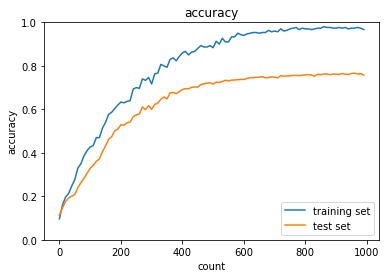

################################################################################
## dropout_radio = 0.08
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.0733 正答率(テスト) = 0.0895
Generation: 0020. 正答率(トレーニング) = 0.0733 正答率(テスト) = 0.0862
Generation: 0030. 正答率(トレーニング) = 0.0833 正答率(テスト) = 0.0903
Generation: 0040. 正答率(トレーニング) = 0.1033 正答率(テスト) = 0.1024
Generation: 0050. 正答率(トレーニング) = 0.1233 正答率(テスト) = 0.1252
Generation: 0060. 正答率(トレーニング) = 0.1767 正答率(テスト) = 0.1577
Generation: 0070. 正答率(トレーニング) = 0.2567 正答率(テスト) = 0.1928
Generation: 0080. 正答率(トレーニング) = 0.2767 正答率(テスト) = 0.2187
Generation: 0090. 正答率(トレーニング) = 0.3467 正答率(テスト) = 0.2470
Generation: 0100. 正答率(トレーニング) = 0.3933 正答率(テスト) = 0.2766
Generation: 0110. 正答率(トレーニング) = 0.4167 正答率(テスト) = 0.2984
Generation: 0120. 正答率(トレーニング) = 0.4233 正答率(テスト) = 0.3206
Generation: 0130. 正答率(トレーニング) = 0.4233 正答率(テスト) = 0.3314
Generation: 0140. 正答率(トレーニング) = 0.4400 正答率(テスト) = 0.3395
Generation: 0150

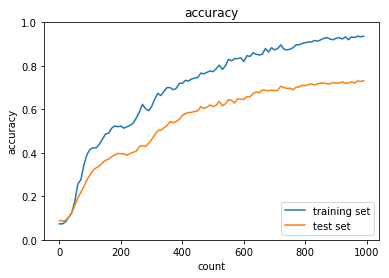

################################################################################
## dropout_radio = 0.1
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.0600 正答率(テスト) = 0.0736
Generation: 0020. 正答率(トレーニング) = 0.0800 正答率(テスト) = 0.0808
Generation: 0030. 正答率(トレーニング) = 0.1200 正答率(テスト) = 0.0981
Generation: 0040. 正答率(トレーニング) = 0.1400 正答率(テスト) = 0.1172
Generation: 0050. 正答率(トレーニング) = 0.1633 正答率(テスト) = 0.1377
Generation: 0060. 正答率(トレーニング) = 0.1933 正答率(テスト) = 0.1569
Generation: 0070. 正答率(トレーニング) = 0.2267 正答率(テスト) = 0.1863
Generation: 0080. 正答率(トレーニング) = 0.2467 正答率(テスト) = 0.2017
Generation: 0090. 正答率(トレーニング) = 0.2733 正答率(テスト) = 0.2108
Generation: 0100. 正答率(トレーニング) = 0.2800 正答率(テスト) = 0.2194
Generation: 0110. 正答率(トレーニング) = 0.2800 正答率(テスト) = 0.2227
Generation: 0120. 正答率(トレーニング) = 0.2800 正答率(テスト) = 0.2253
Generation: 0130. 正答率(トレーニング) = 0.2900 正答率(テスト) = 0.2287
Generation: 0140. 正答率(トレーニング) = 0.2967 正答率(テスト) = 0.2289
Generation: 0150.

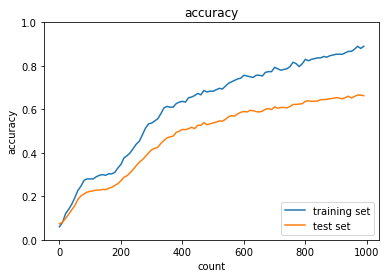

################################################################################
## dropout_radio = 0.12
################################################################################
Generation: 0010. 正答率(トレーニング) = 0.1300 正答率(テスト) = 0.1267
Generation: 0020. 正答率(トレーニング) = 0.1367 正答率(テスト) = 0.1419
Generation: 0030. 正答率(トレーニング) = 0.1933 正答率(テスト) = 0.1626
Generation: 0040. 正答率(トレーニング) = 0.2300 正答率(テスト) = 0.1887
Generation: 0050. 正答率(トレーニング) = 0.2300 正答率(テスト) = 0.2110
Generation: 0060. 正答率(トレーニング) = 0.2433 正答率(テスト) = 0.2349
Generation: 0070. 正答率(トレーニング) = 0.2600 正答率(テスト) = 0.2594
Generation: 0080. 正答率(トレーニング) = 0.3233 正答率(テスト) = 0.2804
Generation: 0090. 正答率(トレーニング) = 0.3333 正答率(テスト) = 0.2983
Generation: 0100. 正答率(トレーニング) = 0.3533 正答率(テスト) = 0.3178
Generation: 0110. 正答率(トレーニング) = 0.3733 正答率(テスト) = 0.3366
Generation: 0120. 正答率(トレーニング) = 0.3800 正答率(テスト) = 0.3459
Generation: 0130. 正答率(トレーニング) = 0.3933 正答率(テスト) = 0.3602
Generation: 0140. 正答率(トレーニング) = 0.4200 正答率(テスト) = 0.3729
Generation: 0150

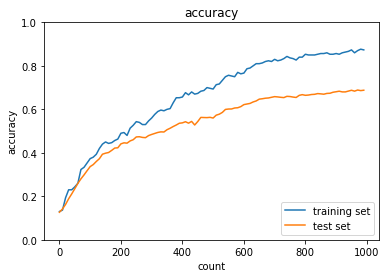

In [31]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.08
dropout_ratio = 0.04
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.08
dropout_ratio = 0.06
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.08
dropout_ratio = 0.08
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.08
dropout_ratio = 0.10
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

################################################################################
## 【レポート提出者変更】以後再実行に必要な箇所のみ追加実装
################################################################################

# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.08
dropout_ratio = 0.12
# ====================================================

print('################################################################################')
print('## dropout_radio = ' + str(dropout_ratio))
print('################################################################################')

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        ## 【レポート提出者変更】
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        print('Generation: {:0=4}. 正答率(トレーニング) = {:1.4f} 正答率(テスト) = {:1.4f}'.format(i+1, accr_train, accr_test))


plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()
